<a href="https://colab.research.google.com/github/DiegoAPerezG2009/BigD_KonradLorenz/blob/DiegoP%C3%A9rez/Tratamiendo_de_datos.%20Diego%20P%C3%A9rez.%205%20de%20octubre%202023%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314931 sha256=de92cb94a59d7cb9c45110c8aa7bff38ed84a1994c2bfec60fa8ba0625062fdb
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
# activate R magic
%load_ext rpy2.ipython


Instalando paquetería

In [3]:
%%R
install.packages("gapminder")
install.packages("dslabs")
install.packages("NHANES")

UsageError: Cell magic `%%R` not found.


Cargando los paquetes.

In [ ]:
%%R
library("gapminder")
library("dplyr")
library("dslabs")
library("NHANES")


Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union


Attaching package: ‘dslabs’



    gapminder




Los paquetes tienen dentro de sí bases de datos para prácticar, entonces cargaré los datos de diferentes paquetes y los guardaré en variables nuevas.

inspección de bases de datos, es una buena práctica para saber que los datos estan bien cargados.

In [ ]:
%%R
data(NHANES)
NHANES%>%head(2)

# A tibble: 2 × 76
     ID Surve…¹ Gender   Age AgeDe…² AgeMo…³ Race1 Race3 Educa…⁴ Marit…⁵ HHInc…⁶
  <int> <fct>   <fct>  <int> <fct>     <int> <fct> <fct> <fct>   <fct>   <fct>  
1 51624 2009_10 male      34 " 30-3…     409 White <NA>  High S… Married 25000-…
2 51624 2009_10 male      34 " 30-3…     409 White <NA>  High S… Married 25000-…
# … with 65 more variables: HHIncomeMid <int>, Poverty <dbl>, HomeRooms <int>,
#   HomeOwn <fct>, Work <fct>, Weight <dbl>, Length <dbl>, HeadCirc <dbl>,
#   Height <dbl>, BMI <dbl>, BMICatUnder20yrs <fct>, BMI_WHO <fct>,
#   Pulse <int>, BPSysAve <int>, BPDiaAve <int>, BPSys1 <int>, BPDia1 <int>,
#   BPSys2 <int>, BPDia2 <int>, BPSys3 <int>, BPDia3 <int>, Testosterone <dbl>,
#   DirectChol <dbl>, TotChol <dbl>, UrineVol1 <int>, UrineFlow1 <dbl>,
#   UrineVol2 <int>, UrineFlow2 <dbl>, Diabetes <fct>, DiabetesAge <int>, …
# ℹ Use `colnames()` to see all variable names


In [ ]:
%%R

data(heights)
heights%>%head()

     sex height
1   Male     75
2   Male     70
3   Male     68
4   Male     74
5   Male     61
6 Female     65


In [ ]:
%%R

data(murders)
murders%>%head()

       state abb region population total
1    Alabama  AL  South    4779736   135
2     Alaska  AK   West     710231    19
3    Arizona  AZ   West    6392017   232
4   Arkansas  AR  South    2915918    93
5 California  CA   West   37253956  1257
6   Colorado  CO   West    5029196    65


In [ ]:
%%R

data(gapminder)
gapminder%>%head()

              country year infant_mortality life_expectancy fertility
1             Albania 1960           115.40           62.87      6.19
2             Algeria 1960           148.20           47.50      7.65
3              Angola 1960           208.00           35.98      7.32
4 Antigua and Barbuda 1960               NA           62.97      4.43
5           Argentina 1960            59.87           65.39      3.11
6             Armenia 1960               NA           66.86      4.55
  population          gdp continent          region
1    1636054           NA    Europe Southern Europe
2   11124892  13828152297    Africa Northern Africa
3    5270844           NA    Africa   Middle Africa
4      54681           NA  Americas       Caribbean
5   20619075 108322326649  Americas   South America
6    1867396           NA      Asia    Western Asia


Vamor a aprender a usar el comando PIPE de dplyr y a trabajar dentro del universo tidyverse.

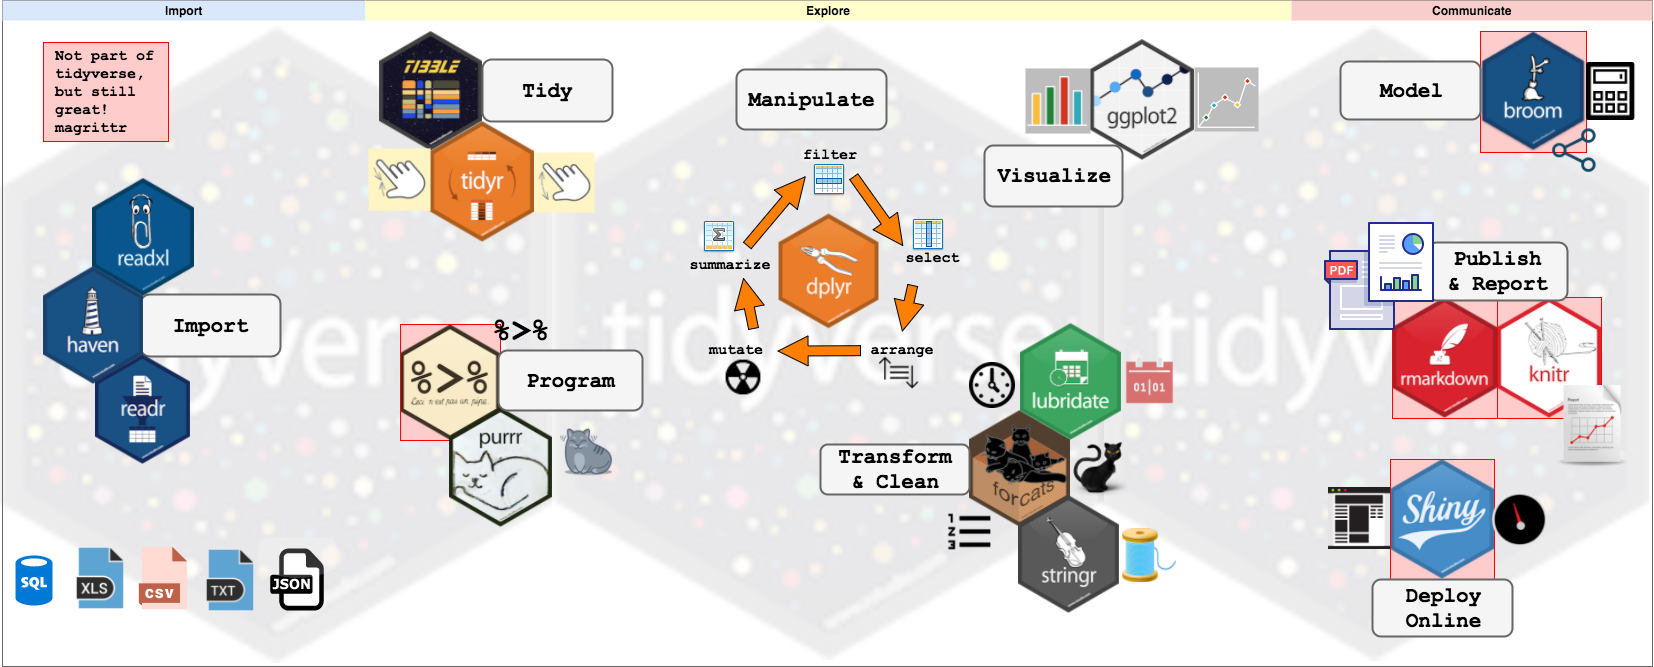

In [ ]:
%%R

# filtrar datos por pais sin %>%  == >=
f<-filter(gapminder, country == 'Mexico')
print(head(f))

  country year infant_mortality life_expectancy fertility population
1  Mexico 1960            100.6           57.34      6.78   38174114
2  Mexico 1961             97.7           57.95      6.78   39394125
3  Mexico 1962             94.9           58.49      6.77   40649590
4  Mexico 1963             90.8           58.96      6.77   41939880
5  Mexico 1964             89.3           59.40      6.77   43264267
6  Mexico 1965             87.6           59.78      6.77   44623041
           gdp continent          region
1  94354817785  Americas Central America
2  99075314540  Americas Central America
3 103696598044  Americas Central America
4 112103163998  Americas Central America
5 125449584624  Americas Central America
6 133686930877  Americas Central America


Bien, ya comprendimos el uso de comandos por medio de lenguaje R tradicional, ahora, usemos los PIPE.

In [ ]:
%%R

continentes=gapminder %>%
   filter(continent == 'Asia')

continentes%>%head(2)

     country year infant_mortality life_expectancy fertility population gdp
1    Armenia 1960               NA           66.86      4.55    1867396  NA
2 Azerbaijan 1960               NA           61.33      5.57    3897889  NA
  continent       region
1      Asia Western Asia
2      Asia Western Asia


In [ ]:
%%R

continentes<-gapminder %>%
   filter(continent == 'Asia')

In [ ]:
%%R

# filtrar datos por año
año<- gapminder %>%
   filter(year == '1952')

In [ ]:
%%R
# filtrar paises con esperanza de vida mayor o igual a 40 y el año en 2002
gapminder %>%
   filter(life_expectancy <=40,
          year == 2002)

[1] country          year             infant_mortality life_expectancy 
[5] fertility        population       gdp              continent       
[9] region          
<0 rows> (or 0-length row.names)


In [ ]:
%%R
# hacer resumenes de datos---------------------------------------------

# cantidad de paises en Asia para el año 2007
paises<-gapminder %>%
   filter(continent == 'Asia',
          year == 2007) %>%
   summarise(conteo = n())

In [ ]:
%%R
# maxima esparanza de vida
q=gapminder %>%
   summarise(max(life_expectancy))

In [ ]:
%%R
# agrupando esperanza de vida promedio por año
promedio<-gapminder %>%
   group_by(year) %>%
   summarise(mean(life_expectancy))

In [ ]:
#dyplyer más a profundidad----------------------------------------------------
z<-gapminder %>%
   group_by(continent, year) %>%
   summarize(sum(lifeExp))

z1<- gapminder%>%
   group_by(year) %>%
   filter(continent == 'Asia') %>%
   mutate(asiaxaño = m(pop))

SyntaxError: ignored

In [ ]:
%%R
#función mutate
z1<- archivo %>%
   group_by(YEAR) %>%
   filter(UNIVERSAL == 10) %>%
   mutate(Pelis = mean(UNIVERSAL))

In [ ]:
%%R

# el objeto está comprendido en.
employee_new_data %>%
   filter(employee_name %in% c("Amanda"))

In [ ]:
%%R
#El objeto NO esta comprendido en.
employee_new_data %>%
   filter(!employee_name %in% c("Amanda"))

In [ ]:
%%R

#un filtro de todos los años que tengan 0, despues haga un mutate en una
#columna nueva y guardelos seguncontengan o no el comando que yo le indique.
ceros<-archivo_tible %>%
   mutate(
      contiene_0 = grepl('0', YEAR)) %>%
   select_('YEAR', 'contiene_0')

nos ayuda a aplicar un mismo comando sobre diferentes lineas de codigo o sobre una variable especifica

si quiero sacar el minimo, maximo y media de la esperanza de vida, del producto
percapital del pais y de la vairbale llmada gdp, pordia hacerlo asi:

In [ ]:
%%R
#comando across ---------------------------------------------------
master1=gapminder %>%
   group_by(year) %>%
   summarise(
      # Esperanza de vida
      lifeExp_min = min(life_expectancy),
      lifeExp_max = max(life_expectancy),
      lifeExp_mean = mean(life_expectancy),
      # Poblacion
      pop_min = min(population),
      pop_max = max(population),
      pop_mean = mean(population),
      # GDP
      gpd_min = min(gdp),
      gpd_max = max(gdp),
      gpd_mean = mean(gdp)

   )
master1%>%head(2)

In [ ]:
%%R
master2=gapminder %>%
   group_by(year) %>%
   summarise(
      dplyr::across(
         c(life_expectancy,population, gdp),
         list(min, max, mean)
      )
   )
master2%>%head(2)

#Manipulación de Datos

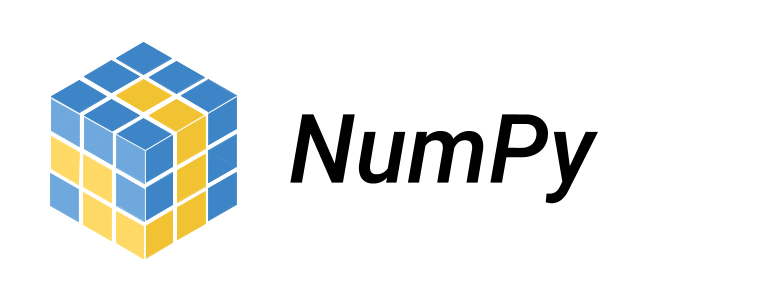

Aqui les dejo el repositorio oficial de numpy por si de casualidad tienen alguna duda al respecto. ---> https://numpy.org/doc/stable/

##NumPy

NumPy (Numerical Python), es una biblioteca de Python que da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel. La funcionalidad principal de NumPy es su estructura de datos ndarray (arreglos), para una matriz de n dimensiones, sobre las cuales se pueden realizar operaciones matemátias de manera eficiente.

Crearemos una lista usando codigo nativo de Python y lo convertiremos en una matriz unidimensional con la función np.array()

In [5]:
import numpy as np

list1 = [6,8,10,12,14]
array1 = np.array(list1)
print(array1)

[ 6  8 10 12 14]


Los ndarrays son estructuras de datos genéricas para almacenar datos homogéneos. Son equivalentes a las matrices y los vectores en álgebra, por lo que también se les puede aplicar operaciones matemáticas. Notar que las operaciones matemáticas se pueden realizar en todos los valores en un ndarray a la vez.

In [9]:

print(array1 - 2)
print(array1 * array1, "\n\n")
print(array1 * 2,5)

[ 4  6  8 10 12]
[ 36  64 100 144 196] 


[12 16 20 24 28] 5


Los arreglos se encierran entre [], pero al imprimirlos no están separados por comas. Hay diferentes formas de crear arreglos con propiedades específicas, lo que les provee bastante flexibilidad.

En el siguiente cuadro se presentan algunas de esas funciones:

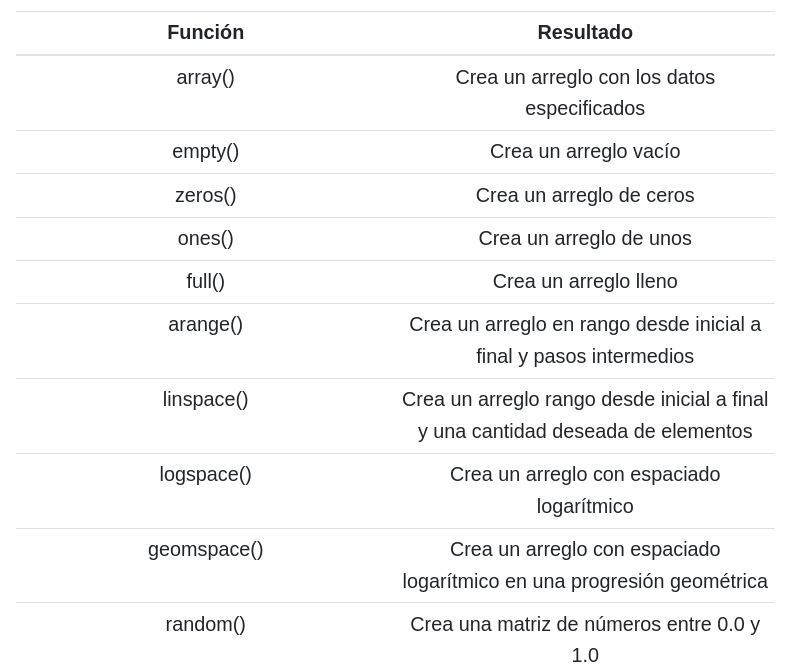

In [17]:
print(np.array([[1,4],[3,6]]),'\n')
print(np.ones((3,6),'\n'))
print(np.arange(10,20,45),'\n')
print(np.linspace(0,5/4,5),'\n')
print(np.random.rand(2,6),'\n')

[[1 4]
 [3 6]] 

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[10] 

[0.     0.3125 0.625  0.9375 1.25  ] 

[[0.33062273 0.88718002 0.96273632 0.54499784 0.63348047 0.64726872]
 [0.74724686 0.52894879 0.91704697 0.01925803 0.52450648 0.85059139]] 



# Se podrían medir la cantidad de decimales?**texto en negrita**

Otros argumentos importantes de objetos numpy son los siguientes:
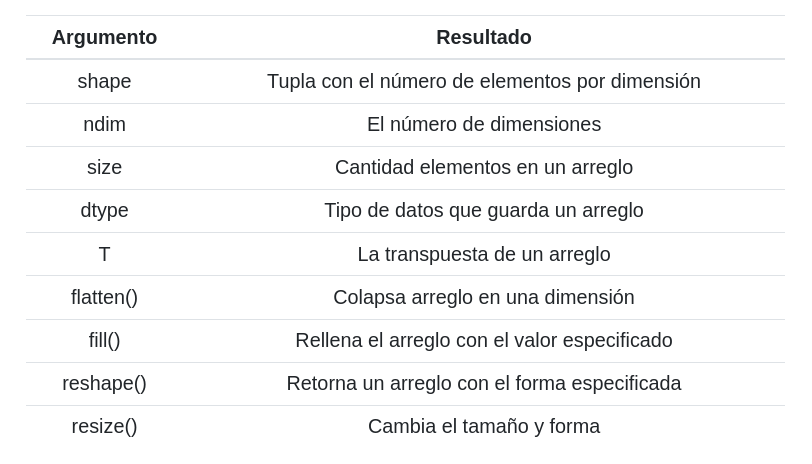

In [19]:
arr1 = np.array([np.arange(0,5), np.arange(0,5)*5])
print(arr1)
print(arr1.shape)
print(arr1.size)
print(arr1.ndim)
print(arr1.T)

[[ 0  1  2  3  4]
 [ 0  5 10 15 20]]
(2, 5)
10
2
[[ 0  0]
 [ 1  5]
 [ 2 10]
 [ 3 15]
 [ 4 20]]


In [16]:
arr = np.array([1,2,3,4,5,6,7])
print(arr[1:6])# de 1 al 3 en índice
print(arr[4:])# de la posición 4 en adelante
print(arr[::3])# de uno por medio

[2 3 4 5 6]
[5 6 7]
[1 4 7]


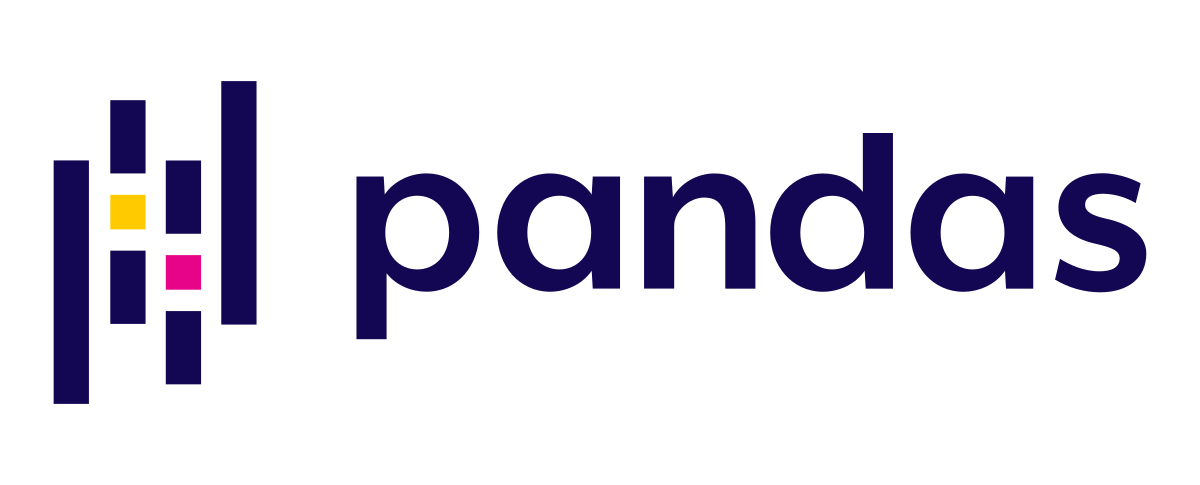

Les dejo el official guideline de Pandas por si tienen dudas de alguna de las funciones del pquete y la necesitan en el futuro ---> https://pandas.pydata.org/docs/user_guide/index.html

Pandas (PANel DAta) es una biblioteca Python para manipulación y análisis de datos. Fue construida sobre NumPy. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.

Series. Una serie es un arreglo de datos indexados donde los valores que se guardan con un índice explícito. La función pd.Series()se utiliza para la creación de series. Para crear una serie con índice, tenemos que proporcionar un índice con el mismo número de elementos.

In [22]:
import pandas as pd
import numpy as np

data = np.array(['d', 'a', 'p', 'g', 'm'])
ser = pd.Series(data, index =[20, 8, 9, 13, 14])
print(ser)

20    d
8     a
9     p
13    g
14    m
dtype: object


Diccionarios. Si se usan diccionarios, las llaves se toman como índices y los valores los números de la serie.

In [23]:
dic = {'leones' : 1110,
        'curubas' : 2220,
        'coches' : 3330,
        'iguanas' : 4440}

ser = pd.Series(dic)
print(ser)

leones     1110
curubas    2220
coches     3330
iguanas    4440
dtype: int64


Accesar datos de series. Para acceder a un dato específico de la serie, hay que acceder al índice del mismo como con arreglos y listas.

In [24]:
print(ser['coches'])
print(ser[2])
print(ser['iguanas'])
print(ser[3])

3330
3330
4440
4440


DataFrames. En un DataFrame (tabla de datos), a diferencia de los ndarrays de NumPy, se pueden tener distintos tipos de datos. Cada columna es un objeto de tipo Series de Pandas. Las filas se identifican con un índice y las columnas con una etiqueta. Se usa la función pd.DataFrame() para crearlos.

In [25]:
datos = [[10, 111, 12222, 13333],
         [20, 211, 22222, 23333],
         [30, 311, 32222, 33333]]

columnas = ['C1', 'C2', 'C3', 'C4'] # definimos los nombres de las columnas
filas = ['F1', 'F2', 'F3'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)

print(df)

    C1   C2     C3     C4
F1  10  111  12222  13333
F2  20  211  22222  23333
F3  30  311  32222  33333


In [26]:
df.head()

C1   C2     C3     C4
F1  10  111  12222  13333
F2  20  211  22222  23333
F3  30  311  32222  33333

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, F1 to F3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C1      3 non-null      int64
 1   C2      3 non-null      int64
 2   C3      3 non-null      int64
 3   C4      3 non-null      int64
dtypes: int64(4)
memory usage: 228.0+ bytes


In [35]:
df.T

F1     F2     F3
C1     10     20     30
C2    111    211    311
C3  12222  22222  32222
C4  13333  23333  33333

In [36]:
df.describe()

C1     C2       C3       C4
count   3.0    3.0      3.0      3.0
mean   20.0  211.0  22222.0  23333.0
std    10.0  100.0  10000.0  10000.0
min    10.0  111.0  12222.0  13333.0
25%    15.0  161.0  17222.0  18333.0
50%    20.0  211.0  22222.0  23333.0
75%    25.0  261.0  27222.0  28333.0
max    30.0  311.0  32222.0  33333.0

#DataFrames a partir de diccionarios

In [37]:
datos = {
    'Nombre' : ['Juanita', 'Aura', 'Pedrito'],
    'Edad': [102, 22, 17],
    'Departamento': ['biología', 'química', 'geología']}

df = pd.DataFrame(datos)

print(df)

    Nombre  Edad Departamento
0  Juanita   102     biología
1     Aura    22      química
2  Pedrito    17     geología


Descarga de archivos. Pandas posee una gran cantidad de formas para leer y escribir datos en diferentes formatos. Generalmente se debe indicar el path o dirección del archivo, así como el delimitador de los datos o el nombre de la hoja en algunos casos. La función pd.read_csv() permite cargar archivos .csv y guardarlos en un objeto de Pandas.

En github también se puede trabajar con la misma configuración de documentos.

Hay 3 formas de leer archivos desde github y google drive

1. copiando la ruta.
2. creando un putente de comunicación.
3. modificando el url del documento a trabajar. ---> para el caso de

In [ ]:
EJEMPLOS....

In [40]:
import pandas as pd


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
url="/content/drive/MyDrive/Prestigious/ARTÍCULOS PLATA.xlsx"

In [42]:
ejemplo.head()

SOCIEDAD Unnamed: 1           Unnamed: 2     Unnamed: 3 Unnamed: 4  \
0   CÓDIGO     NOMBRE          DESCRIPCIÓN  PRECIO COMPRA  COMPRADO    
1        1     Anillo                Doble          24000          2   
2        2     Anillo         Tríple línea          24000          1   
3        3     Anillo  Diamante dos líneas          24000          1   
4        4     Anillo   Diamante diagonal           24000          1   

  Unnamed: 5    Unnamed: 6 Unnamed: 7   Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0     GASTOS  PRECIO VENTA   VENDIDO   DISPONIBLE    INGRESOS    UTILIDAD   
1      48000         40000          2            0      80000    0.666667   
2      24000         45000          1            0      45000       0.875   
3      24000         45000          1            0      45000       0.875   
4      24000         40000        NaN            1      40000    0.666667   

  Unnamed: 11  Unnamed: 12 Unnamed: 13  
0         NaN          NaN         NaN  
1         NaN          NaN         NaN  
2         NaN          NaN         NaN  
3         NaN          NaN         NaN  
4         NaN          NaN         NaN

In [43]:
ejemplo.info

<bound method DataFrame.info of     SOCIEDAD  Unnamed: 1           Unnamed: 2     Unnamed: 3 Unnamed: 4  \
0     CÓDIGO      NOMBRE          DESCRIPCIÓN  PRECIO COMPRA  COMPRADO    
1          1      Anillo                Doble          24000          2   
2          2      Anillo         Tríple línea          24000          1   
3          3      Anillo  Diamante dos líneas          24000          1   
4          4      Anillo   Diamante diagonal           24000          1   
..       ...         ...                  ...            ...        ...   
127      NaN  Pasacadena              Letra E          10000          1   
128      NaN  Pasacadena              Corazón          10000          1   
129      NaN  Pasacadena                 Luna          10000          1   
130      NaN   Tobillera               Cruces          18000          1   
131      NaN         NaN                  NaN            NaN        NaN   

    Unnamed: 5    Unnamed: 6 Unnamed: 7   Unnamed: 8 Unnamed: 9 Unn

In [44]:
ejemplo.describe

<bound method NDFrame.describe of     SOCIEDAD  Unnamed: 1           Unnamed: 2     Unnamed: 3 Unnamed: 4  \
0     CÓDIGO      NOMBRE          DESCRIPCIÓN  PRECIO COMPRA  COMPRADO    
1          1      Anillo                Doble          24000          2   
2          2      Anillo         Tríple línea          24000          1   
3          3      Anillo  Diamante dos líneas          24000          1   
4          4      Anillo   Diamante diagonal           24000          1   
..       ...         ...                  ...            ...        ...   
127      NaN  Pasacadena              Letra E          10000          1   
128      NaN  Pasacadena              Corazón          10000          1   
129      NaN  Pasacadena                 Luna          10000          1   
130      NaN   Tobillera               Cruces          18000          1   
131      NaN         NaN                  NaN            NaN        NaN   

    Unnamed: 5    Unnamed: 6 Unnamed: 7   Unnamed: 8 Unnamed: 9 U

In [41]:
ejemplo=pd.read_excel(url)

In [47]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris =  pd.read_csv(csv_url, names = col_names)
iris.head(2)

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa

##Resumen

basta con llamar a la función .describe

In [ ]:
iris.describe()

Ordenamiento. Podemos ordenar de forma descendente de acuerdo a los valores de una variable

In [ ]:
iris.sort_values(by='Sepal_Width', ascending=False).head(5)

Eliminación de filas

In [ ]:
iri = iris.drop([0])
iri

Eliminación de columnas. El parámetro axis=1 implica que la eliminación se refiere a columnas

In [ ]:
iri = iris.drop(['Petal_Width'],axis=1)
iri.head()

Selección de columnas

In [ ]:
iris['Sepal_Length'].head()
iris.Sepal_Length.head()

Selección por posición

In [ ]:
iris.iloc[10:14, 0:2]

Selección usando condicionales

In [ ]:
iris[(iris['Sepal_Length'] == 4.9) & (iris['Petal_Length'] > 1.4)]

Concatenar dataframes agregando filas

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index = [0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index = [4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index = [8, 9, 10, 11])

pd.concat([df1, df2, df3])

Unir dataframes agregando columnas

In [ ]:
left = pd.DataFrame({'Key': ['K0', 'K1', 'K2', 'K3'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'Key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

pd.merge(left, right, how ='inner', on ='Key')

Agrupamiento La función groupby() se utiliza para separar por grupos los datos de acuerdo a variables específicas. Sobre esta agrupación se pueden realizar diferentes tipos de cálculos.

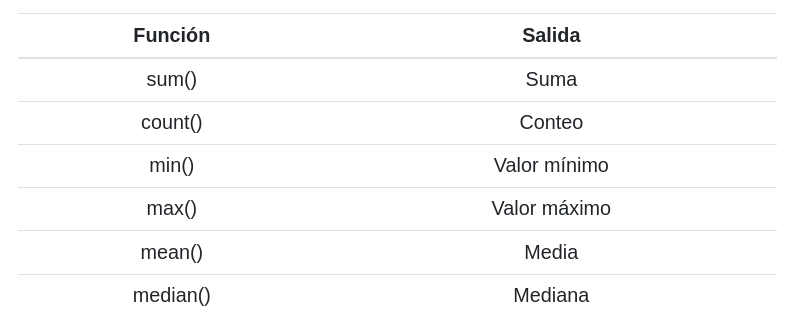

In [ ]:
iris.groupby(['Species'])[['Sepal_Length']].mean()
iris.groupby(['Species']).mean()

#Pasar sentencias de código de R a Python

In [ ]:
# Importar las bibliotecas necesarias
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [ ]:
# Crear un dataframe en R
r_dataframe = robjects.r('data.frame(x=c(1,2,3), y=c("a","b","c"))')
r_dataframe

In [ ]:
# Convertir el dataframe de R a un dataframe de Pandas en Python
pandas_dataframe = pd.DataFrame(r_dataframe)
# Imprimir el dataframe de Pandas en Python
print(pandas_dataframe)

#Ahora al contrario de Python a R

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from rpy2 import robjects
from rpy2.robjects import pandas2ri

In [ ]:
# Crear un dataframe en Python
python_dataframe = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']})


In [ ]:
# Convertir el dataframe de Python a un dataframe de R
pandas2ri.activate()
r_dataframe = pandas2ri.py2rpy(python_dataframe)

# Imprimir el dataframe de R
print(r_dataframe)